# Human Face Exploratory Data Analysis -- Male & Female Faces Dataset
A web scraped dataset of male and female faces suggested for image processing models
See more at: https://www.kaggle.com/datasets/ashwingupta3012/male-and-female-faces-dataset

In [3]:
import os
import cv2
import matplotlib.pyplot as plt

## Data Loading

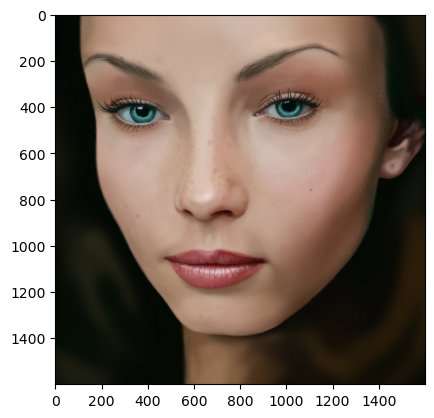

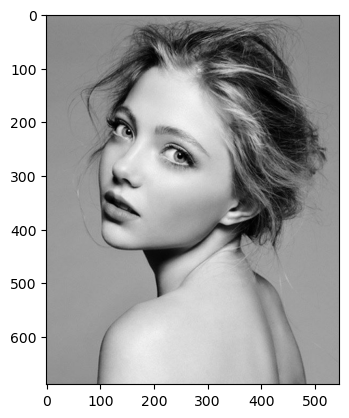

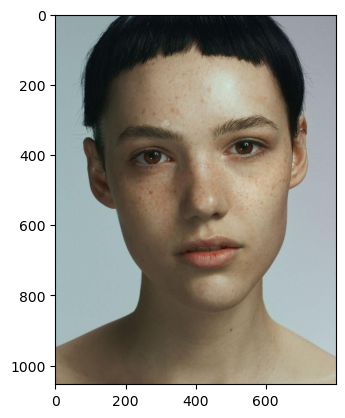

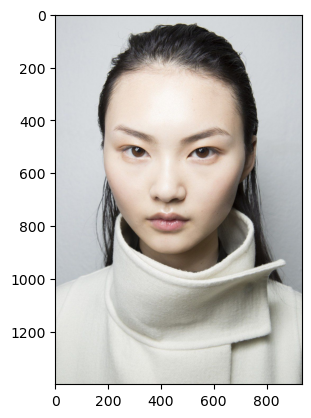

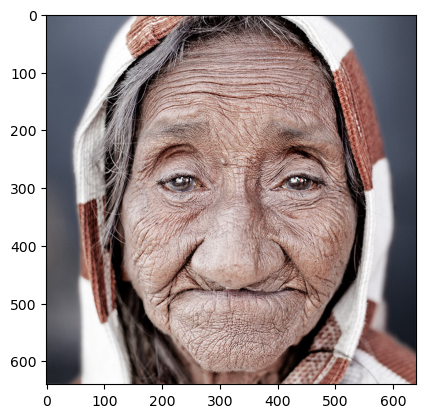

In [4]:
dataset_path = '../data/raw/Male and Female face dataset/Female Faces'

# List all files in the dataset directory
all_files = os.listdir(dataset_path)
image_files = [f for f in all_files if f.endswith(('.jpg', '.png'))]

# Load and display 5 sample images
sample_images = []
for image_file in image_files[:5]:
    image_path = os.path.join(dataset_path, image_file)
    image = cv2.imread(image_path)
    sample_images.append(image)

for img in sample_images:
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

## Data Visualization

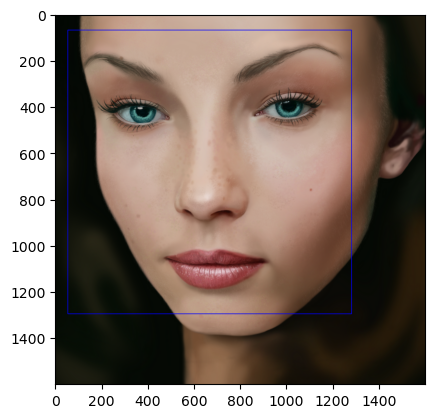

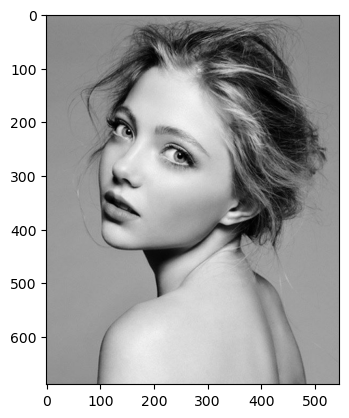

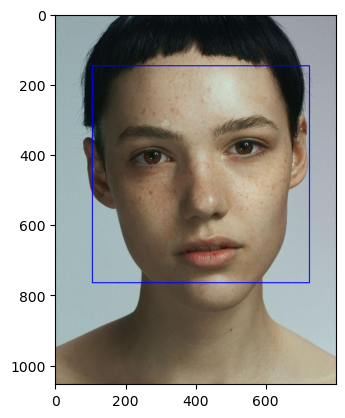

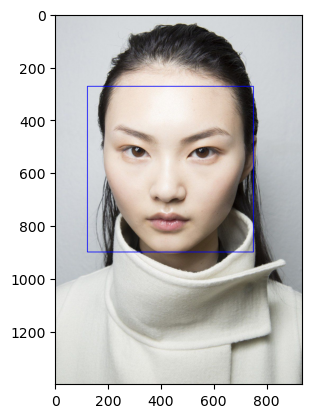

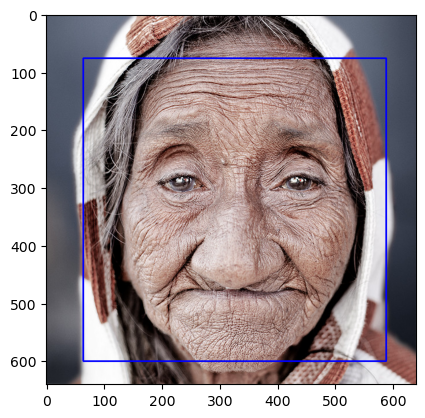

In [6]:

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

for img in sample_images:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

## Face Size and Position Analysis

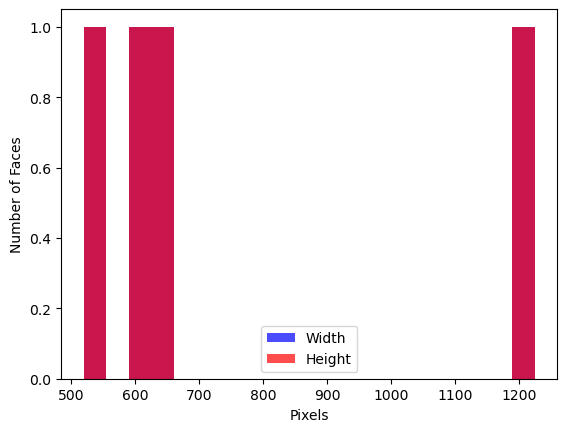

In [7]:
face_sizes = []

for img in sample_images:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    for (x, y, w, h) in faces:
        face_sizes.append((w, h))

# Plotting the distribution of face widths and heights
face_widths = [w for w, h in face_sizes]
face_heights = [h for w, h in face_sizes]

plt.hist(face_widths, bins=20, color='blue', alpha=0.7, label='Width')
plt.hist(face_heights, bins=20, color='red', alpha=0.7, label='Height')
plt.xlabel('Pixels')
plt.ylabel('Number of Faces')
plt.legend()
plt.show()

## Data Quality and Diversity

Checking for Duplicates

In [10]:
import hashlib

def dhash(image, hash_size=8):
    resized = cv2.resize(image, (hash_size + 1, hash_size))
    diff = resized[:, 1:] > resized[:, :-1]
    return sum([2 ** i for (i, v) in enumerate(diff.flatten()) if v])

hashes = {}
duplicates = []

for image_file in image_files:
    image_path = os.path.join(dataset_path, image_file)
    image = cv2.imread(image_path, 0)  # Load in grayscale
    h = dhash(image)
    if h in hashes:
        duplicates.append((image_path, hashes[h]))
    else:
        hashes[h] = image_path

print(f"Found {len(duplicates)} duplicate images.")


Found 148 duplicate images.


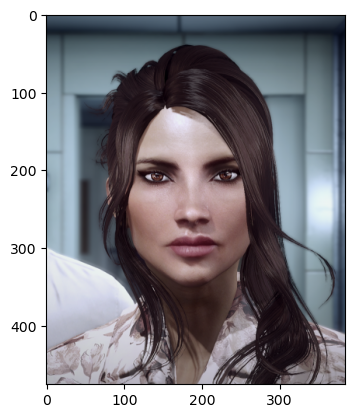

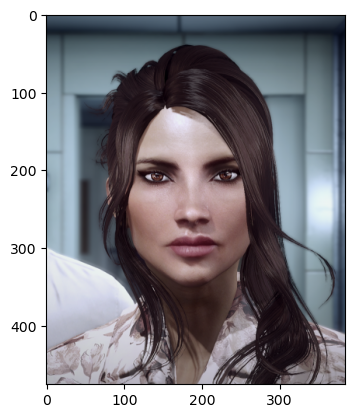

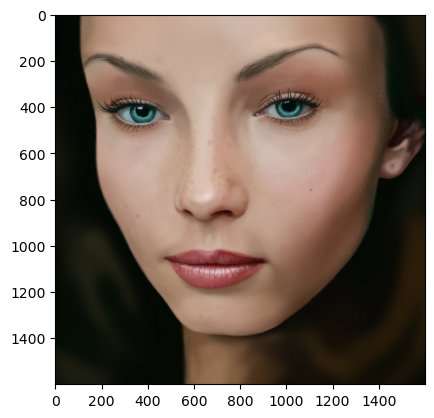

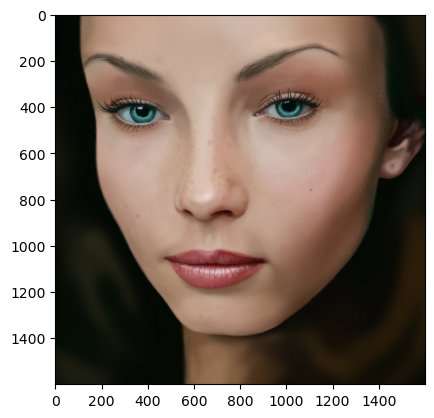

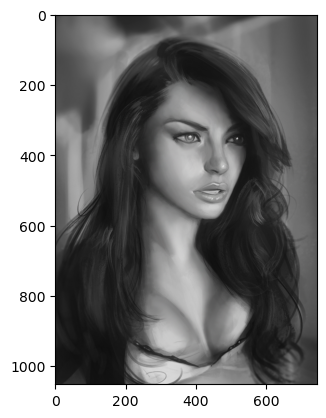

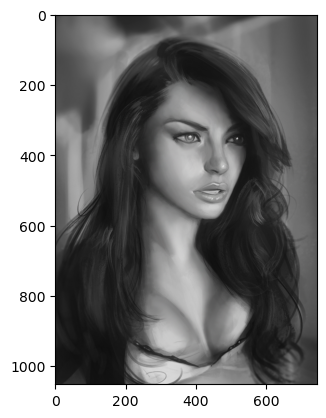

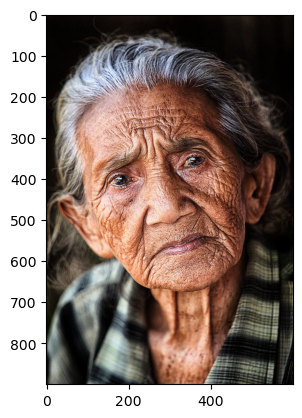

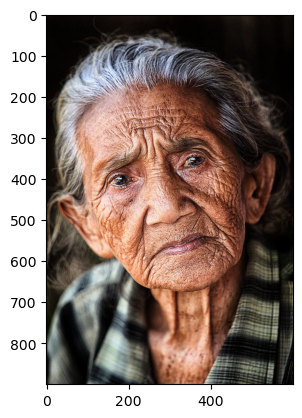

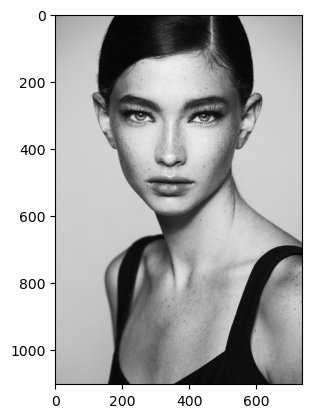

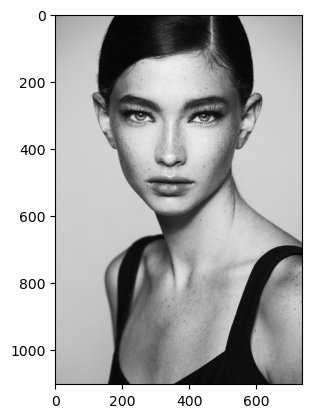

In [11]:
# Veryify that the images are indeed duplicates by displaying them
for dup in duplicates[:5]:
    img1 = cv2.imread(dup[0])
    img2 = cv2.imread(dup[1])
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    plt.show()
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    plt.show()


In [12]:
# Remove the duplicate images
for dup in duplicates:
    os.remove(dup[0])

In [13]:
# Viewing how many images are left
all_files = os.listdir(dataset_path)
print(len(all_files))

438


In [14]:
# Update image files list
image_files = [f for f in all_files if f.endswith(('.jpg', '.png'))]

Checking for Low-Quality Images

In [15]:
def variance_of_laplacian(image):
    return cv2.Laplacian(image, cv2.CV_64F).var()

blurry_images = []

for image_file in image_files:
    image_path = os.path.join(dataset_path, image_file)
    image = cv2.imread(image_path, 0)  # Load in grayscale
    if variance_of_laplacian(image) < 100:  # Threshold can be adjusted
        blurry_images.append(image_path)

print(f"Found {len(blurry_images)} blurry images.")

Found 125 blurry images.


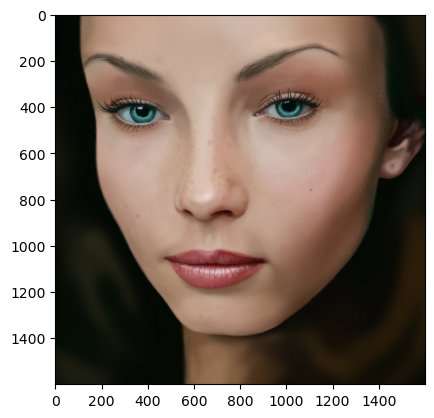

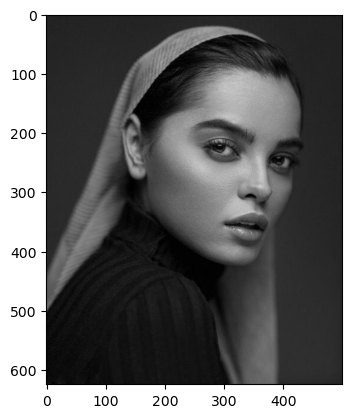

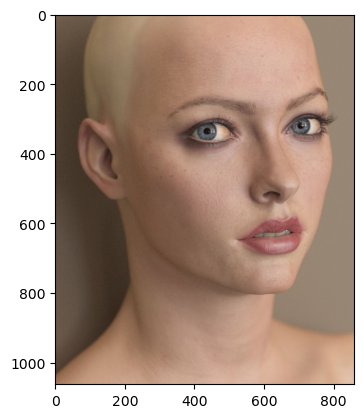

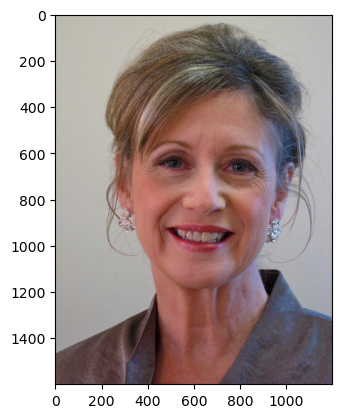

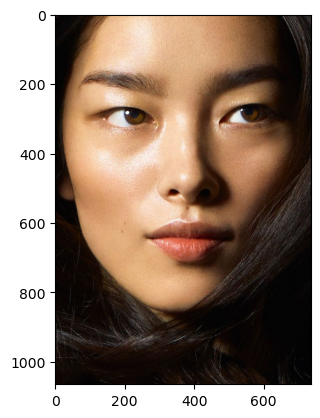

In [16]:
# Viewing the blurry images
for image_path in blurry_images[:5]:
    image = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()